# template construction:
1. Make a directory for your data. Copy or link all the images into it.
2. On the command line, within that directory, run the following command: bash
antsMultivariateTemplateConstruction2.sh to get usage.
# **Example: **
antsMultivariateTemplateConstruction.sh -d 3 -m 30x50x20 -t GR -s CC -c 1 -o MY -z InitialTemplate.nii.gz  *RF*T1x.nii.gz

- In this example 30x50x20 iterations per registration are used for template creation (that is the default)
- Greedy-SyN and CC are the metrics to guide the mapping.
- Output is prepended with MY and the initial template is InitialTemplate.nii.gz (optional).
- The -c option is set to 1, which will result in using the Sun Grid Engine (SGE) to distribute the computation.
- if you do not have SGE, read the help for multi-core computation on the local machine, or Apple X-grid options.


**1-Creat a folder for template construction and copy all anatoical data to this folder**

In [1]:
import os
import glob
from shutil import copyfile, rmtree

data_path = '/mnt/d/Data/Chick/Imprinting/analysis'
template_path = '/mnt/d/Data/Chick/Imprinting/analysis/template'
anat_dirs = glob.glob('%s/sub*/anat/anat_brain.nii.gz'%(data_path))

 # creat a template directory
if os.path.exists(template_path):
    pass
else:
    os.mkdir(template_path)
    
for curr_anat in anat_dirs:
    print(curr_anat)
    D = curr_anat.split('/');
    D1 = 'highres_'+D[-3]+'.nii.gz'
    dst = os.path.join(template_path,D1)
    copyfile(curr_anat,dst)

/mnt/d/Data/Chick/Imprinting/analysis/sub09/anat/anat_brain.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub11/anat/anat_brain.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub12/anat/anat_brain.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub18/anat/anat_brain.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub19/anat/anat_brain.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub21/anat/anat_brain.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub22/anat/anat_brain.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub24/anat/anat_brain.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub29/anat/anat_brain.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub31/anat/anat_brain.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub32/anat/anat_brain.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub34/anat/anat_brain.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub35/anat/anat_brain.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub36/anat/anat_brain.nii.gz
/mnt/d/Data/Chick/Imprinting/analysis/sub37/anat/anat_brain.ni

**2- run antsMultivariateTemplateConstruction**

In [2]:
import os
os.chdir(template_path)
os.system('antsMultivariateTemplateConstruction.sh -d 3 -m 30x50x20 -t GR -s CC -c 0 -o MY -z standard.nii.gz Highres*.nii.gz')

0

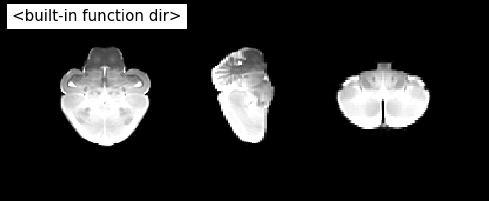

In [3]:
from nilearn.plotting import plot_anat
%matplotlib inline
import matplotlib.pyplot as plt
import os
import glob
data_path = '/mnt/d/Data/Chick/Imprinting/analysis/template/MYtemplate0.nii.gz'

plot_anat(data_path, title=dir, cut_coords = (20,20,10), display_mode='ortho', dim=-1, draw_cross=False, annotate=False)